# IMPORTING REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
dataset = pd.read_csv("C:/Users/Hp/Documents/heart_statlog_cleveland_hungary_final.csv")

In [3]:
# viewing the dataset
dataset.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
# checking the statistical measures of the dataset
dataset.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


### CORRELATION HEATMAP

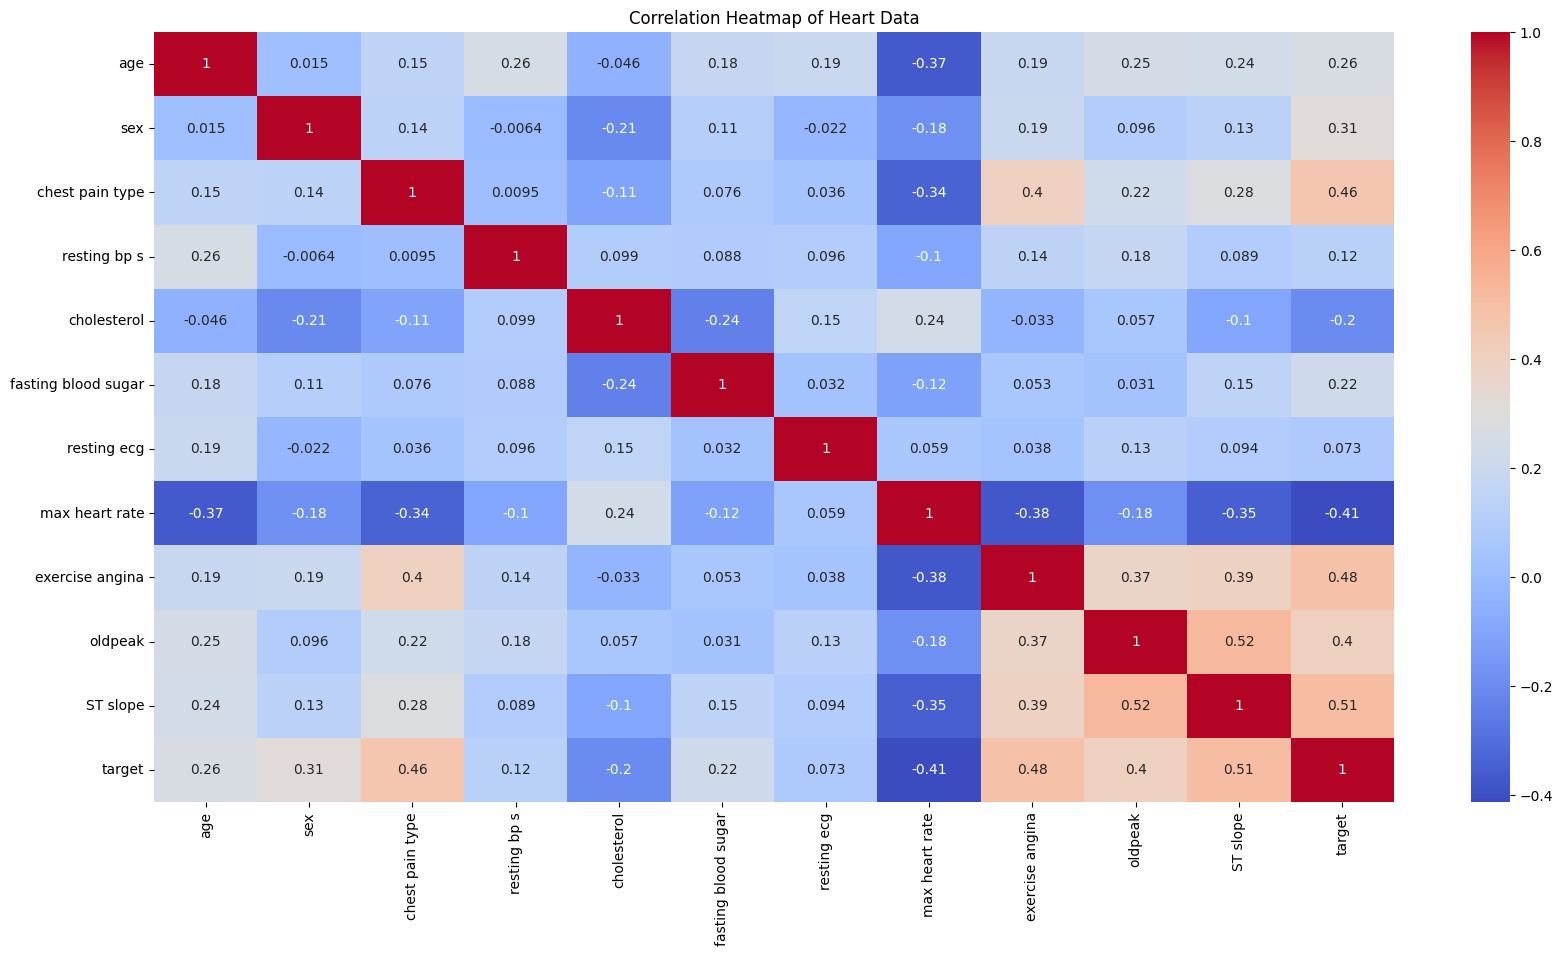

In [5]:
plt.figure(figsize=(20, 10))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap of Heart Data")
plt.show()

### PLOTTING THE COUNT OF ALL THE DATASET FEATURES

[Text(0, 0, '254'),
 Text(0, 0, '461'),
 Text(0, 0, '629'),
 Text(0, 0, '831'),
 Text(0, 0, '909'),
 Text(0, 0, '1098.1'),
 Text(0, 0, '1933'),
 Text(0, 0, '3847'),
 Text(0, 0, '63927'),
 Text(0, 0, '157263'),
 Text(0, 0, '166282'),
 Text(0, 0, '250333')]

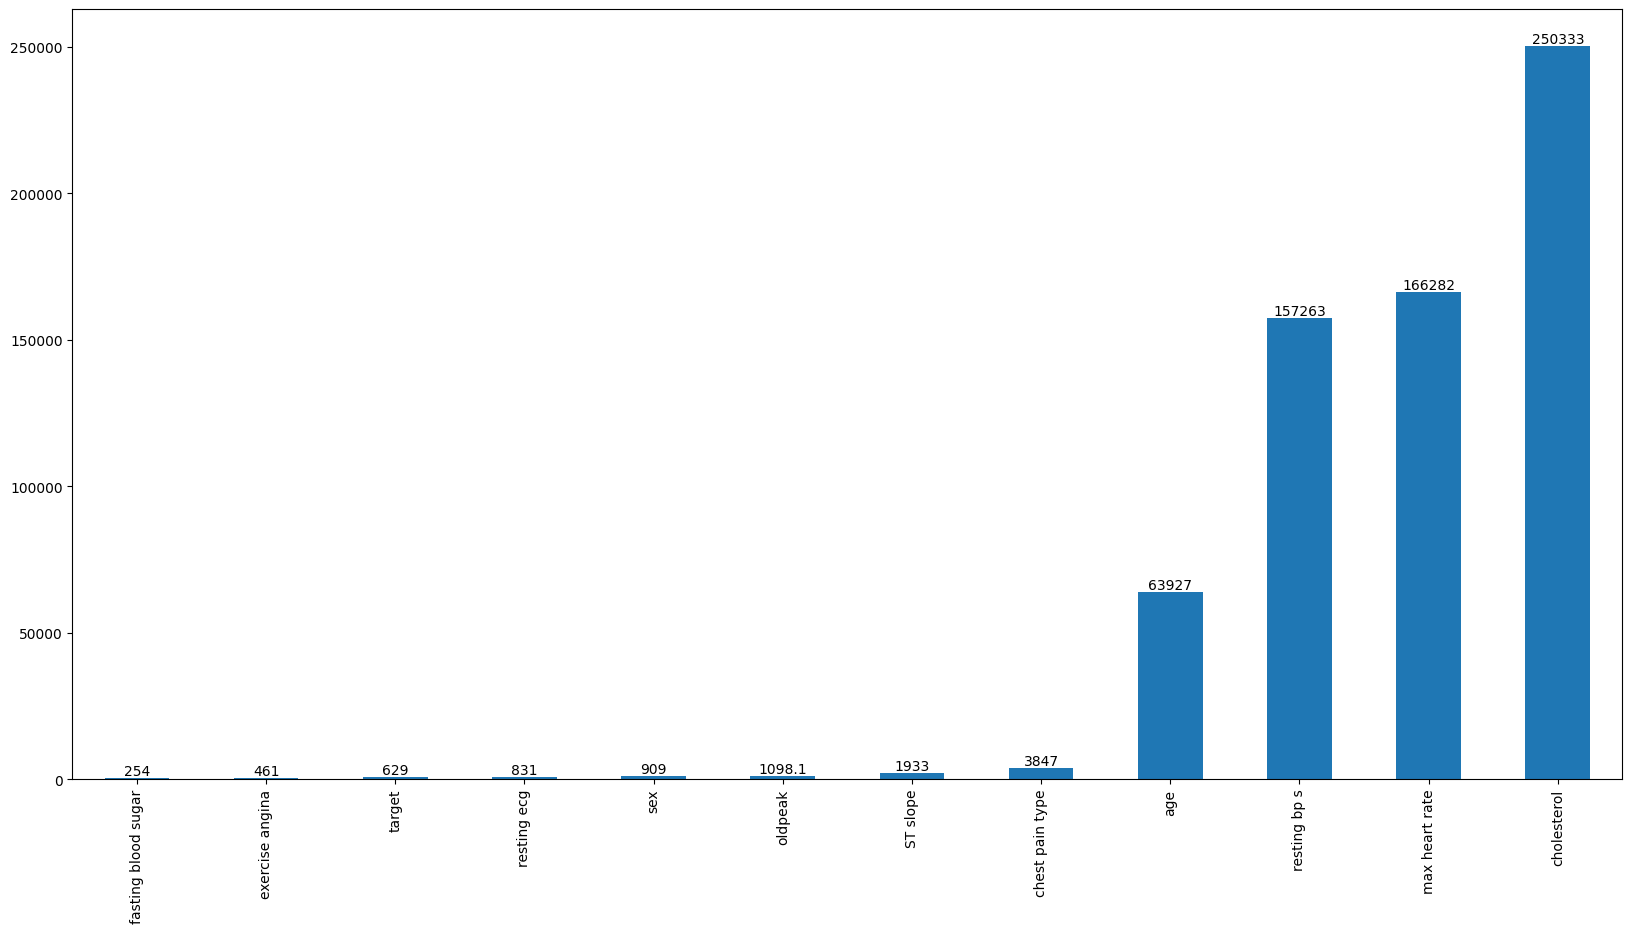

In [6]:
# plotting the sum of value counts of the q25 columns
plt.figure(figsize=(20, 10))
ax = dataset.sum().sort_values().plot(kind = "bar")
ax.bar_label(ax.containers[0])

### GENERAL COUNTPLOT

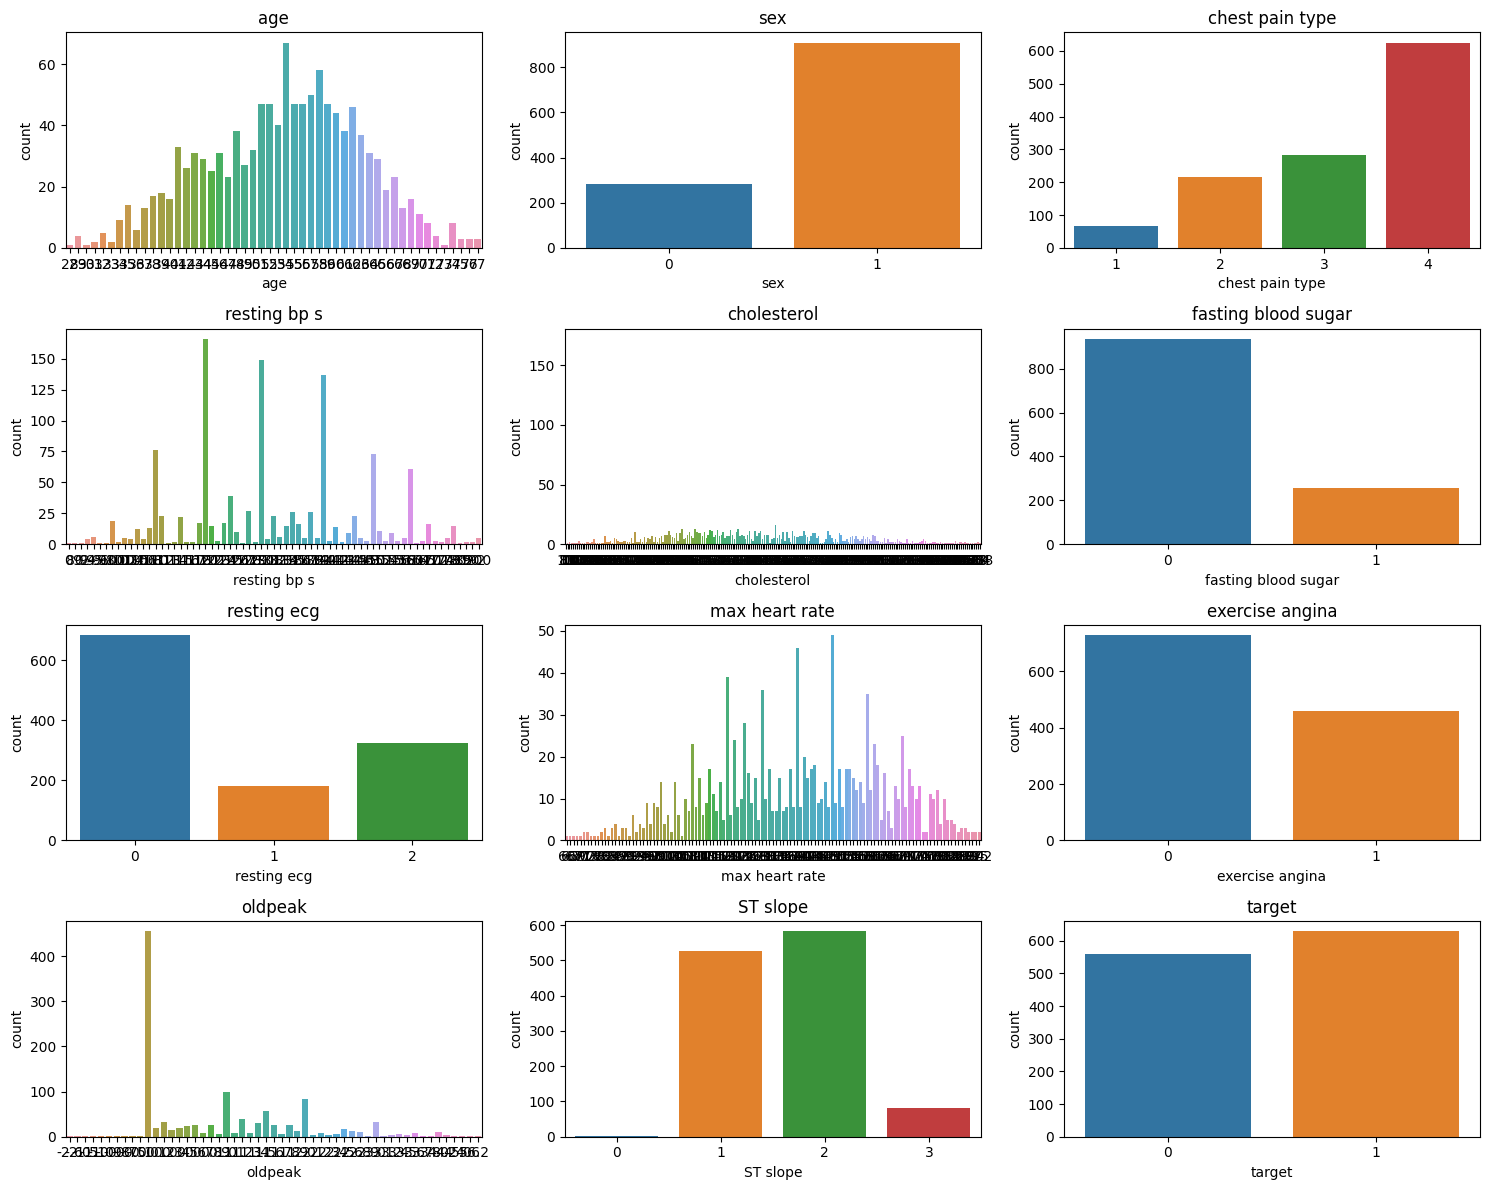

In [7]:
# creates a countplot for each of the features in the dataset
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
for i, col in enumerate(dataset.columns):
    ax = axes[i//3, i%3]
    sns.countplot(x=col, data=dataset, ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

### DATA FREQUENCY DISTRIBUTION

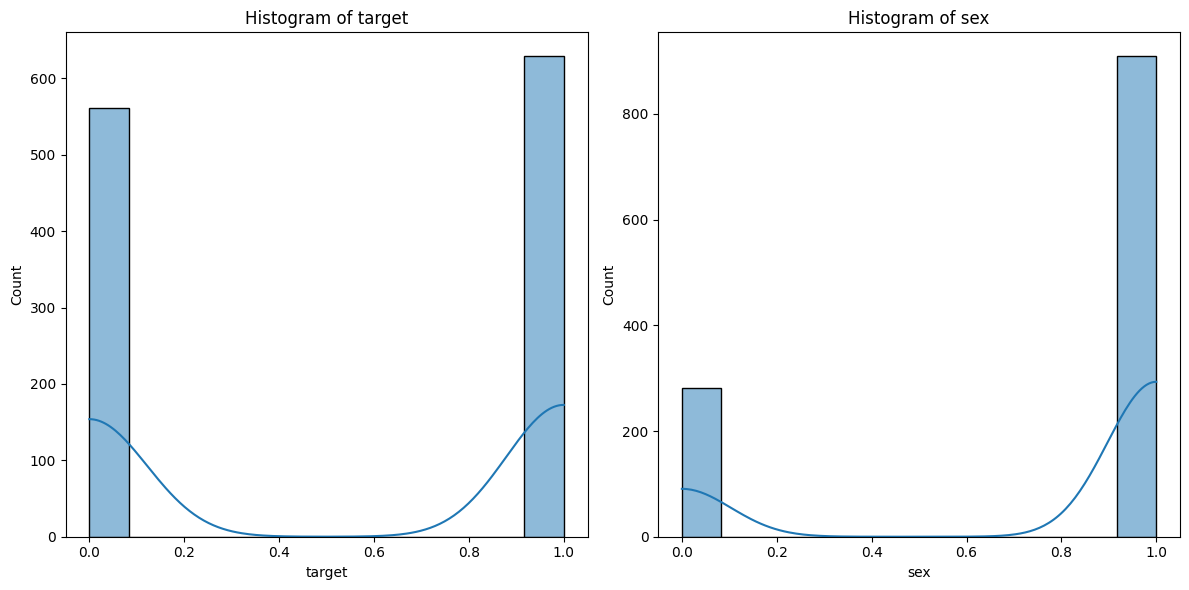

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# first subplot
sns.histplot(data=dataset, x="target", ax=axes[0], kde=True)
# second subplot
sns.histplot(data=dataset, x="sex", ax=axes[1], kde=True)
# titles
axes[0].set_title("Histogram of target")
axes[1].set_title("Histogram of sex")

# show plot
plt.tight_layout()
plt.show()

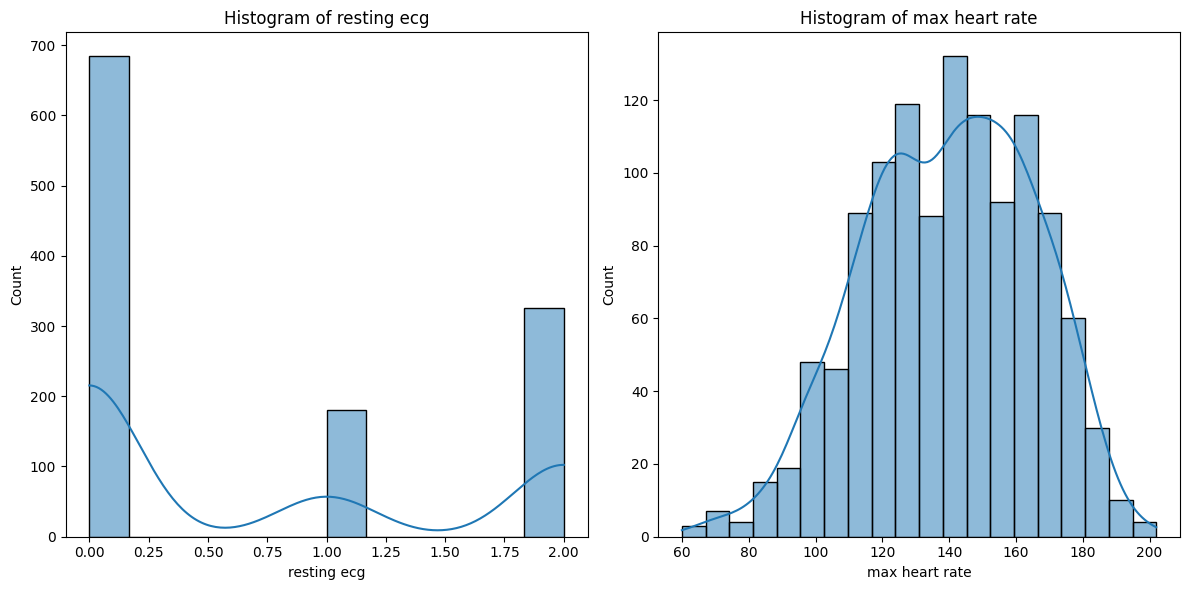

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# first subplot
sns.histplot(data=dataset, x="resting ecg", ax=axes[0], kde=True)
# second subplot
sns.histplot(data=dataset, x="max heart rate", ax=axes[1], kde=True)
# titles
axes[0].set_title("Histogram of resting ecg")
axes[1].set_title("Histogram of max heart rate")

# show plot
plt.tight_layout()
plt.show()

### DATA SPLITTING AND NORMALIZATION

In machine learning, data can be inputed in several magnitudes and sometimes it may hinder the model from learning some important data points or features correctly, with such a problem, the need to normalize or standardize our data becomes of utmost importance. Normalization is a technique used to transform the features of a dataset into a common scale, that is to represent the datapoints magnitude within a common range so that the machine learning is not influenced by the disproportional datapoints helping the data to converge faster and perform better.

In [10]:
# separates the dependent and the independent variables
X = dataset.drop("target", axis = 1) #independent columns
y = dataset["target"] #target

In [11]:
# splits the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

# MACHINE LEARNING

# LOGISTIC REGRESSION

In [12]:
# craete a pipeline with PCA and scaler
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression())
])

In [13]:
# fit the pipeline on training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [14]:
# Test set evaluation
accuracy = pipeline.score(X_test, y_test)

In [15]:
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 80.25%


In [16]:
# make predictions
y_pred = pipeline.predict(X_test)

In [17]:
# print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       115
           1       0.80      0.82      0.81       123

    accuracy                           0.80       238
   macro avg       0.80      0.80      0.80       238
weighted avg       0.80      0.80      0.80       238



In [18]:
class_labels = ["Yes", "No"]

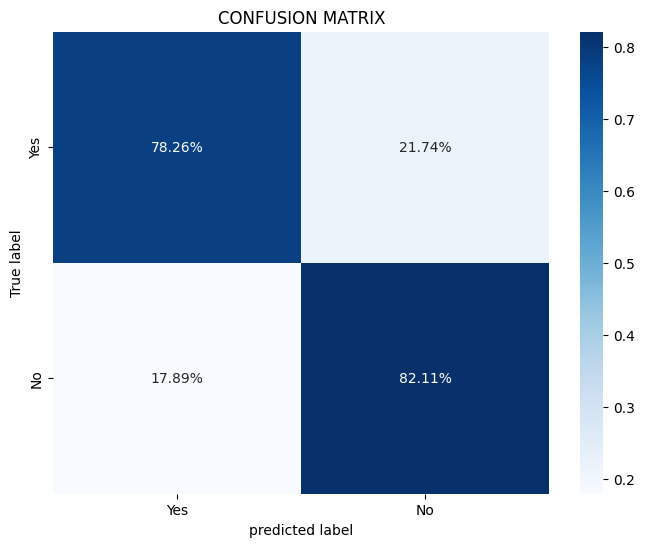

In [19]:
# CREATE A CONFUSION MATRIX
c_matrix = confusion_matrix(y_test, y_pred)
c_matrix_percentage = c_matrix.astype("float") / c_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix_percentage, annot=True, cmap="Blues", fmt=".2%", cbar=True, xticklabels=class_labels, yticklabels=class_labels)
plt.title("CONFUSION MATRIX")
plt.xlabel("predicted label")
plt.ylabel("True label")
plt.show()

# RANDOM FOREST CLASSIFIER

In [20]:
# craete a pipeline with PCA and scaler
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", RandomForestClassifier(n_estimators=300, random_state=46, max_depth=10))
])

In [21]:
# fit the pipeline on training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=10, n_estimators=300,
                                        random_state=46))])

In [22]:
# make predictions
y_pred = pipeline.predict(X_test)

In [23]:
# Test set evaluation
accuracy = pipeline.score(X_test, y_test)

In [24]:
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 92.44%


In [25]:
# print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.87      0.92       115
           1       0.89      0.98      0.93       123

    accuracy                           0.92       238
   macro avg       0.93      0.92      0.92       238
weighted avg       0.93      0.92      0.92       238



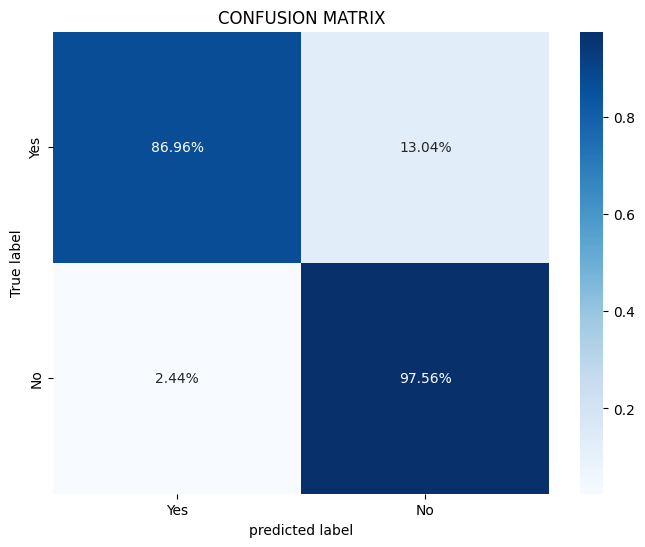

In [26]:
c_matrix = confusion_matrix(y_test, y_pred)
c_matrix_percentage = c_matrix.astype("float") / c_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix_percentage, annot=True, cmap="Blues", fmt=".2%", cbar=True, xticklabels=class_labels, yticklabels=class_labels)
plt.title("CONFUSION MATRIX")
plt.xlabel("predicted label")
plt.ylabel("True label")
plt.show()

# NEURAL NETWORK IMPLEMENTATION

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms import ToTensor
from torchvision import transforms
from tqdm.auto import tqdm
import torch.optim.lr_scheduler as lr_scheduler
from torch.utils.data import Dataset, DataLoader, random_split, WeightedRandomSampler
import torch.nn.functional as F

### CREATE A CUSTOM DATASET CLASS

In [28]:
class Custom_Dataset(Dataset):
    def __init__(self, X, y, transform = None):
        self.X = X
        self.y = y
        self.transform = transform
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]  

In [29]:
# Define normalization transform
transform = transforms.Compose(
    [
    transforms.ToTensor(),
]
)

In [30]:
#### SPLITTING THE DATA INTO FEATURES AND TARGET VARIABLES

In [31]:
X = dataset.drop("target", axis = 1).values
y = dataset["target"].values

#### TRAIN TEST SPLIT

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

In [33]:
# scaling the faetures
scaler = StandardScaler()

In [34]:
X_train = scaler.fit_transform(X_train)

In [35]:
X_test = scaler.transform(X_test)

#### CONVERT TO PYTORCH TENSORS

In [36]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

#### DATASET

In [38]:
train_dataset = Custom_Dataset(X_train, y_train, transform=transform)

In [39]:
test_dataset = Custom_Dataset(X_test, y_test, transform=transform)

#### DATALOADER

In [40]:
train_loader = DataLoader(train_dataset, 
                          batch_size=32, 
                          shuffle=True
                         )

In [41]:
test_loader = DataLoader(test_dataset,
                        batch_size=32,
                        shuffle=False
                        )

In [42]:
# checking the shape
first_batch = next(iter(train_loader))

In [43]:
# checking the dimension of the dataloader
for batch_idx, (inputs, labels) in enumerate(train_loader):
    print(f"Batch {batch_idx + 1}:")
    print(f"Input shape: {inputs.shape}, Labels shape: {labels.shape}")
    break

Batch 1:
Input shape: torch.Size([32, 11]), Labels shape: torch.Size([32])


In [44]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### BUILDING THE NEURAL NETWORK

In [45]:
class MultiLayerPerceptron(nn.Module):
    def __init__(self, input_dim, output_dim, final_activation):
        super(MultiLayerPerceptron, self). __init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_dim)
        self.final_activation = final_activation
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        if self.final_activation == "sigmoid":
            x = torch.sigmoid(self.fc3(x))
        else:
            x = self.fc3(x) # regression linear output
        return x

In [46]:
cls_model = MultiLayerPerceptron(input_dim=X_train.shape[1], output_dim=1, final_activation="sigmoid")

#### MODEL TRAINING

In [47]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=50):
    model.train()
    for epoch in range(num_epochs):
        for inputs, targets in train_loader:
            inputs = inputs.to(device, dtype = torch.float32)
            targets = targets.to(device, dtype = torch.float32)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets.view(-1, 1))
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch+1} / {num_epochs}, Loss: {loss.item()}")

In [49]:
criterion = nn.BCELoss()
optimizer = optim.Adam(cls_model.parameters(), lr=0.001)

In [50]:
train_model(cls_model, train_loader, criterion, optimizer)

Epoch 1 / 50, Loss: 0.3660721480846405
Epoch 2 / 50, Loss: 0.5392777323722839
Epoch 3 / 50, Loss: 0.33786943554878235
Epoch 4 / 50, Loss: 0.45690271258354187
Epoch 5 / 50, Loss: 0.46153950691223145
Epoch 6 / 50, Loss: 0.22198660671710968
Epoch 7 / 50, Loss: 0.30927184224128723
Epoch 8 / 50, Loss: 0.4268104135990143
Epoch 9 / 50, Loss: 0.15688972175121307
Epoch 10 / 50, Loss: 0.2913573682308197
Epoch 11 / 50, Loss: 0.1904962658882141
Epoch 12 / 50, Loss: 0.28606006503105164
Epoch 13 / 50, Loss: 0.25170573592185974
Epoch 14 / 50, Loss: 0.20412999391555786
Epoch 15 / 50, Loss: 0.36084234714508057
Epoch 16 / 50, Loss: 0.33343803882598877
Epoch 17 / 50, Loss: 0.1594521701335907
Epoch 18 / 50, Loss: 0.44034865498542786
Epoch 19 / 50, Loss: 0.1979125291109085
Epoch 20 / 50, Loss: 0.14861322939395905
Epoch 21 / 50, Loss: 0.24752873182296753
Epoch 22 / 50, Loss: 0.41125842928886414
Epoch 23 / 50, Loss: 0.12224455922842026
Epoch 24 / 50, Loss: 0.12318966537714005
Epoch 25 / 50, Loss: 0.184619531

#### EVALUATE THE MODEL

In [53]:
def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        predictions = model(X_test)
        if model.final_activation == "sigmoid":
            predictions = torch.round(predictions)
            correct = (predictions == y_test.view(-1, 1)).float().sum()
            accuracy = correct / y_test.shape[0]
            print(f"Accuracy: {accuracy.item() * 100}")
        else:
            mse = F.mse_loss(predictions, y_test.view(-1, 1))
            print(f"MSE: {mse.item()}")

In [54]:
evaluate_model(cls_model, X_test, y_test)

Accuracy: 87.81512379646301
